<a href="https://colab.research.google.com/github/Sshubam/PyTorch-Code/blob/main/PyTorch_10_nonlinear_sequence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
series = np.sin((0.1*np.arange(400))**2)

In [ ]:
len(series)

400

In [ ]:
series

array([ 0.        ,  0.00999983,  0.03998933,  0.08987855,  0.15931821,
        0.24740396,  0.35227423,  0.47062589,  0.59719544,  0.72428717,
        0.84147098,  0.935616  ,  0.99145835,  0.99290365,  0.92521152,
        0.7780732 ,  0.54935544,  0.24894679, -0.09824859, -0.45146575,
       -0.7568025 , -0.95462777, -0.99186876, -0.83776948, -0.49964188,
       -0.03317922,  0.45895149,  0.84513341,  0.99990226,  0.84936338,
        0.41211849, -0.18416478, -0.72787787, -0.99443221, -0.84489594,
       -0.31111935,  0.38354276,  0.90167577,  0.95449543,  0.47763714,
       -0.28790332, -0.89212936, -0.93545914, -0.35185859,  0.48856477,
        0.98552511,  0.73870603, -0.09869051, -0.86685116, -0.90129136,
       -0.13235175,  0.76898941,  0.94392849,  0.18329174, -0.77433666,
       -0.91915369, -0.05589739,  0.87914899,  0.79409625, -0.24980688,
       -0.99177885, -0.46984205,  0.67494352,  0.91305149, -0.11901275,
       -0.98698706, -0.40985688,  0.78809179,  0.77321143, -0.46

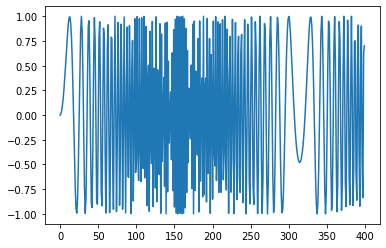

In [ ]:
plt.plot(series)
plt.show()

In [ ]:
T = 10
D = 1
X = []
Y = []

for t in range(len(series) - T):  # 400-10  t=389 because 390 is not included
  x = series[t:t+T]  # X is the series of the past and Y is the future
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y).reshape(-1, 1)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390, 1)


In [ ]:
a = series[t:t+T]
len(a)

10

In [ ]:
t+T

399

In [ ]:
t

389

In [ ]:
series[t:t+T]

array([-0.86121682,  0.45213334,  0.91096696, -0.39051633, -0.92214359,
        0.40156874,  0.90077416, -0.4840401 , -0.83575817,  0.62669331])

In [ ]:
series[t+T]

0.7014823862144136

In [ ]:
model = nn.Linear(T, 1)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [ ]:
X_train = torch.from_numpy(X[:-N//2].astype(np.float32))
y_train = torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test = torch.from_numpy(X[-N//2:].astype(np.float32))
y_test = torch.from_numpy(Y[-N//2:].astype(np.float32))

In [ ]:
def full_gd(model,
            criterion,
            optimizer,
            X_train,
            y_train,
            X_test,
            y_test,
            epochs=200):

  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses[it] = loss.item()
    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    test_losses[it] = test_loss.item()

    if (it + 1) % 5 == 0:
      print(f"Epoch{it+1}/{epochs}, Train Loss: {loss.item():.4f}, Test Loss:{test_loss.item():.4f}")

  return train_losses, test_losses

In [ ]:
train_losses, test_losses = full_gd(model,
                                    criterion,
                                    optimizer,
                                    X_train,
                                    y_train,
                                    X_test,
                                    y_test)

Epoch5/200, Train Loss: 0.5131, Test Loss:0.5838
Epoch10/200, Train Loss: 0.5127, Test Loss:0.6071
Epoch15/200, Train Loss: 0.4939, Test Loss:0.6174
Epoch20/200, Train Loss: 0.4914, Test Loss:0.6107
Epoch25/200, Train Loss: 0.4868, Test Loss:0.5826
Epoch30/200, Train Loss: 0.4877, Test Loss:0.5946
Epoch35/200, Train Loss: 0.4841, Test Loss:0.5959
Epoch40/200, Train Loss: 0.4849, Test Loss:0.5901
Epoch45/200, Train Loss: 0.4835, Test Loss:0.5901
Epoch50/200, Train Loss: 0.4838, Test Loss:0.5886
Epoch55/200, Train Loss: 0.4835, Test Loss:0.5907
Epoch60/200, Train Loss: 0.4835, Test Loss:0.5914
Epoch65/200, Train Loss: 0.4834, Test Loss:0.5887
Epoch70/200, Train Loss: 0.4833, Test Loss:0.5900
Epoch75/200, Train Loss: 0.4834, Test Loss:0.5903
Epoch80/200, Train Loss: 0.4833, Test Loss:0.5888
Epoch85/200, Train Loss: 0.4833, Test Loss:0.5897
Epoch90/200, Train Loss: 0.4833, Test Loss:0.5899
Epoch95/200, Train Loss: 0.4833, Test Loss:0.5894
Epoch100/200, Train Loss: 0.4833, Test Loss:0.5896


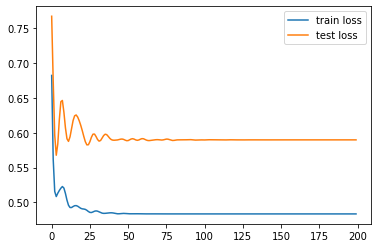

In [ ]:
plt.plot(train_losses, label = "train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

In [ ]:
validation_target = Y[-N//2:]
with torch.no_grad():
  validation_predictions = model(X_test).numpy()
  

In [ ]:
X_test

tensor([[-0.1170,  0.7744, -0.9947,  ..., -0.3589, -0.5153,  0.9949],
        [ 0.7744, -0.9947,  0.6124,  ..., -0.5153,  0.9949, -0.6619],
        [-0.9947,  0.6124,  0.1685,  ...,  0.9949, -0.6619, -0.2425],
        ...,
        [ 0.7511, -0.5787, -0.8612,  ...,  0.4016,  0.9008, -0.4840],
        [-0.5787, -0.8612,  0.4521,  ...,  0.9008, -0.4840, -0.8358],
        [-0.8612,  0.4521,  0.9110,  ..., -0.4840, -0.8358,  0.6267]])

In [ ]:
X_test.shape

torch.Size([195, 10])

In [ ]:
y_test.shape

torch.Size([195, 1])

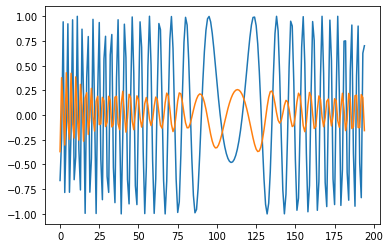

In [ ]:
plt.plot(validation_target, label="validation_target")
plt.plot(validation_predictions, label="validation_predictions")

In [ ]:
N

390

In [ ]:
X

array([[ 0.        ,  0.00999983,  0.03998933, ...,  0.47062589,
         0.59719544,  0.72428717],
       [ 0.00999983,  0.03998933,  0.08987855, ...,  0.59719544,
         0.72428717,  0.84147098],
       [ 0.03998933,  0.08987855,  0.15931821, ...,  0.72428717,
         0.84147098,  0.935616  ],
       ...,
       [ 0.75107958, -0.57868791, -0.86121682, ...,  0.40156874,
         0.90077416, -0.4840401 ],
       [-0.57868791, -0.86121682,  0.45213334, ...,  0.90077416,
        -0.4840401 , -0.83575817],
       [-0.86121682,  0.45213334,  0.91096696, ..., -0.4840401 ,
        -0.83575817,  0.62669331]])

In [ ]:
validation_target = Y[-N//2:]
validation_predictions=[]

last_x = torch.from_numpy(X[-N//2].astype(np.float32))

while len(validation_predictions) < len(validation_target):
  input_ = last_x.reshape(1, -1)
  p = model(input_)

  validation_predictions.append(p[0,0].item())

  last_x = torch.cat((last_x[1:], p[0]))

In [ ]:
last_x[1:]

tensor([0.0226, 0.0226, 0.0226, 0.0226, 0.0226, 0.0226, 0.0226, 0.0226, 0.0226],
       grad_fn=<SliceBackward>)

In [ ]:
X[-N//2]

array([-0.11702018,  0.77435573, -0.99466855,  0.61239114,  0.16851768,
       -0.85091936,  0.95068974, -0.3588588 , -0.51530404,  0.99490115])

In [ ]:
last_x

tensor([0.0226, 0.0226, 0.0226, 0.0226, 0.0226, 0.0226, 0.0226, 0.0226, 0.0226,
        0.0226], grad_fn=<CatBackward>)

In [ ]:
p

tensor([[0.0226]], grad_fn=<AddmmBackward>)

In [ ]:
validation_target

array([[-0.66194867],
       [-0.24254834],
       [ 0.94361947],
       [-0.78319399],
       [-0.12826681],
       [ 0.92347001],
       [-0.78093217],
       [-0.19106845],
       [ 0.96373396],
       [-0.65374839],
       [-0.42220821],
       [ 0.99943923],
       [-0.34186245],
       [-0.75752233],
       [ 0.86924643],
       [ 0.19350297],
       [-0.99421051],
       [ 0.38023153],
       [ 0.79460745],
       [-0.78009934],
       [-0.43818883],
       [ 0.96861638],
       [ 0.06875054],
       [-0.9956242 ],
       [ 0.23378928],
       [ 0.93647255],
       [-0.44462102],
       [-0.85609002],
       [ 0.56919716],
       [ 0.79734204],
       [-0.62122662],
       [-0.78214463],
       [ 0.60922664],
       [ 0.81534357],
       [-0.53107008],
       [-0.88595278],
       [ 0.37522631],
       [ 0.96455886],
       [-0.1290579 ],
       [-0.99960263],
       [-0.20435344],
       [ 0.91972608],
       [ 0.58186925],
       [-0.65347039],
       [-0.8984591 ],
       [ 0

In [ ]:
validation_predictions

[-0.3696923851966858,
 0.30155378580093384,
 -0.09911039471626282,
 -0.025026734918355942,
 0.11794216185808182,
 -0.05914650857448578,
 0.01601788029074669,
 0.07727773487567902,
 -0.06176886707544327,
 0.07455602288246155,
 -0.010731372982263565,
 0.03734179958701134,
 0.02856765314936638,
 0.014943057671189308,
 0.028642358258366585,
 0.025091800838708878,
 0.01619650237262249,
 0.030801495537161827,
 0.01612585410475731,
 0.026242628693580627,
 0.0208604633808136,
 0.02214662730693817,
 0.02312208153307438,
 0.02224668115377426,
 0.022211138159036636,
 0.02337288111448288,
 0.021709352731704712,
 0.023331832140684128,
 0.022163888439536095,
 0.022778458893299103,
 0.022581707686185837,
 0.022547252476215363,
 0.02257881686091423,
 0.022630073130130768,
 0.022480035200715065,
 0.02267611399292946,
 0.022493230178952217,
 0.02262755110859871,
 0.022554580122232437,
 0.022583723068237305,
 0.022578449919819832,
 0.02258211001753807,
 0.02257090061903,
 0.022590387612581253,
 0.0225669

In [ ]:
model(input_)

tensor([[0.0226]], grad_fn=<AddmmBackward>)

In [ ]:
p

tensor([[0.0226]], grad_fn=<AddmmBackward>)

In [ ]:
last_x

tensor([0.0226, 0.0226, 0.0226, 0.0226, 0.0226, 0.0226, 0.0226, 0.0226, 0.0226,
        0.0226], grad_fn=<CatBackward>)

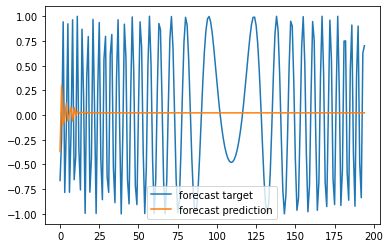

In [ ]:
plt.plot(validation_target, label="forecast target")
plt.plot(validation_predictions, label="forecast prediction")
plt.legend()
#it performs terribly as expected due to overfitting leading to .58 loss